<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banksim.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 171915 to 579286
Data columns (total 5 columns):
age         7200 non-null object
gender      7200 non-null object
category    7200 non-null object
amount      7200 non-null float64
fraud       7200 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 337.5+ KB


In [50]:
# Get the dataframe shape
df.shape

# Display the first 5 rows
df.head()

,age,gender,category,amount,fraud
171915,3,F,es_transportation,49.71,0
426989,4,F,es_health,39.29,0
310539,3,F,es_transportation,18.76,0
215216,4,M,es_transportation,13.95,0
569244,2,M,es_transportation,49.87,0


In [51]:
# Groupby categories and take the mean
print(df.groupby('category').mean())

                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606


In [7]:
# Group by age groups and get the mean
print(df.groupby('age').mean())

        amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000


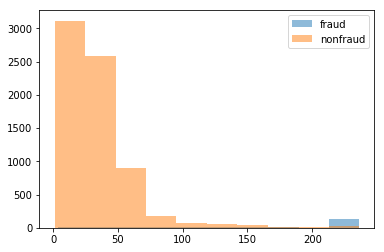

In [10]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

In [52]:
df = pd.read_csv('banksim_adj.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 0 to 7199
Data columns (total 18 columns):
age                      7189 non-null int64
amount                   7189 non-null float64
fraud                    7189 non-null int64
M                        7189 non-null int64
es_barsandrestaurants    7189 non-null int64
es_contents              7189 non-null int64
es_fashion               7189 non-null int64
es_food                  7189 non-null int64
es_health                7189 non-null int64
es_home                  7189 non-null int64
es_hotelservices         7189 non-null int64
es_hyper                 7189 non-null int64
es_leisure               7189 non-null int64
es_otherservices         7189 non-null int64
es_sportsandtoys         7189 non-null int64
es_tech                  7189 non-null int64
es_transportation        7189 non-null int64
es_travel                7189 non-null int64
dtypes: float64(1), int64(17)
memory usage: 1.0 MB


In [25]:
# Don't need this - but good exercise to create!
df = df[df['age'] != 'U']
df['age'] = df['age'].astype('float')
df = pd.get_dummies(df, columns=['category'])
df['M'] = 0
df.loc[df['gender'] == 'M', 'M'] = 1
df = df.drop('gender', axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 171915 to 579286
Data columns (total 19 columns):
age                               7189 non-null float64
amount                            7189 non-null float64
fraud                             7189 non-null int64
category_es_barsandrestaurants    7189 non-null uint8
category_es_contents              7189 non-null uint8
category_es_fashion               7189 non-null uint8
category_es_food                  7189 non-null uint8
category_es_health                7189 non-null uint8
category_es_home                  7189 non-null uint8
category_es_hotelservices         7189 non-null uint8
category_es_hyper                 7189 non-null uint8
category_es_leisure               7189 non-null uint8
category_es_otherservices         7189 non-null uint8
category_es_sportsandtoys         7189 non-null uint8
category_es_tech                  7189 non-null uint8
category_es_transportation        7189 non-null uint8
category_es_travel

In [53]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Transform df into a numpy array
X = np.array(df).astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [55]:
import matplotlib.pyplot as plt

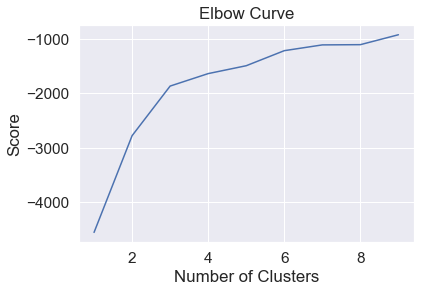

In [56]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
y = df['fraud']

In [58]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [59]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import seaborn as sn

def plot_confusion_matrix(km_cm):
  df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
  plt.figure(figsize = (8,4))
  sn.set(font_scale=1.4) 
  sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
  plt.show()

0.9703717698082832


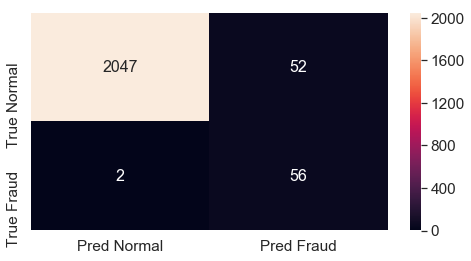

In [60]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

In [66]:
from sklearn.metrics import homogeneity_score, silhouette_score
labels = y

In [67]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 26
Homogeneity: 0.922
Silhouette Coefficient: 0.707


In [71]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the counts of the smallest clusters only
print("The clusters are:")      
print(smallest_clusters)

# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

The clusters are:
[21 18 24]
Their counts are:
[10 10 11]


In [74]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels, 'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21)|(df['clusternr']==18)|(df['clusternr']==24),1 , 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'],
                  df['predicted_fraud'],
                  rownames=['Actual Fraud'],
                  colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6979  10
1               179  21
